## Poisson distribution

เรามาทำความเข้าใจกับ Poisson distribution ผ่านทาง binomial distribution กัน

ก่อนอื่นเรามาทบทวน binomial distribution กันก่อน  เวลากล่าวถึงตัวแปรสุ่มที่มีการกระจายแบบ binomial distribution เราจะพิจารณาการทดลองลักษณะดังนี้

**การทดลองสุ่มที่ 1**  ให้เหรียญที่ออกหัวด้วยความน่าจะเป็น $p$ ทดลองโยนเหรียญ $n$ ครั้ง (แบบอิสระต่อกัน) จากนั้นนับจำนวนครั้งที่เหรียญออกหัว

ตัวแปรสุ่มที่แทนจำนวนครั้งที่เหรียญออกหัวจากการทดลองสุ่มที่ 1 จะมีการกระจายแบบ binomial   สาเหตุที่เรียกว่าเป็นการกระจายแบบ binomial เพราะว่าถ้าเราคิดความน่าจะเป็นที่ตัวแปรสุ่มดังกล่าวจะมีค่า $i$ เราจะพบว่ามีค่าเท่ากับ

$$ {n \choose i}\cdot p^i (1-p)^{n-i} $$

สังเกตว่าจากการทดลองทั้งหมด จำนวนรูปแบบที่ได้หัว $i$ ครั้งมี ${n \choose i}$ แบบ แต่ละแบบเกิดขึ้นไม่พร้อมกัน (disjoint) และมีความน่าจะเป็นที่ได้แต่ละแบบเท่ากันหมด คือ $p^i(1-p)^{n-i}$

### มาดูหน้าตากัน

เราจะทดลอง plot การกระจายดูสำหรับค่า $n$ และ $k$ บางค่า

In [2]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

เริ่มจากค่ามาตรฐาน $n=10$ และ $p=0.5$

<Container object of 11 artists>

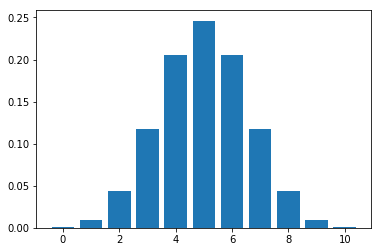

In [7]:
n, p = 10, 0.5

x = np.arange(0, n+1, 1)
y = [binom.pmf(i, n, p) for i in x]

plt.bar(x,y)

ลองเพิ่ม $n=40$ และปรับ $p$ ให้ลดลงเป็น $0.1$

<Container object of 41 artists>

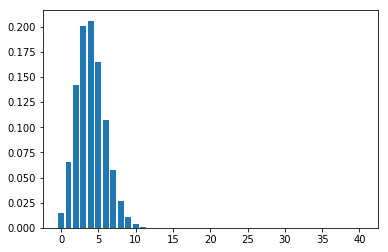

In [9]:
n, p = 40, 0.1

x = np.arange(0, n+1, 1)
y = [binom.pmf(i, n, p) for i in x]

plt.bar(x,y)

สังเกตว่าการกระจายจะไปสูงที่ใกล้ ๆ 4 ซึ่งจริง ๆ แล้วน่าจะเป็นจุดที่มีค่าสูงที่สุดและเป็นค่าเฉลี่ยของตัวแปรสุ่มนี้ด้วย

สำหรับตัวแปรสุ่มแบบ binomial ค่าเฉลี่ย (หรือค่าคาดหวัง expectation) จะมีค่าเท่ากับ $np$

### ทดลองปรับค่าเล่น (เพิ่ม $n$ ลด $p$)

ทีนี้ ถ้าเราลองเพิ่ม $n$ แต่พยายามให้ค่าเฉลี่ยเท่าเดิม ลองพิจารณารูปการกระจายด้านล่าง

เพื่อให้เปรียบเทียบไม่ยาก จะขอวาดการกระจายแค่ที่ตัวแปรสุ่มมีค่าระหว่าง 0 - 40 เท่านั้น

**กรณีแรก ให้ $n=100, p=0.04$**

<Container object of 41 artists>

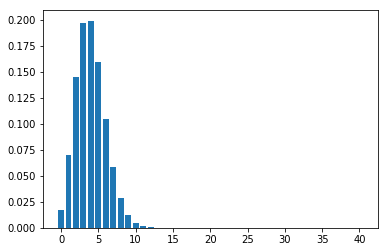

In [11]:
# ให้ n = 100, p = 0.04, np = 4
n, p = 100, 0.04

x = np.arange(0, 41, 1)
y = [binom.pmf(i, n, p) for i in x]

plt.bar(x,y)

**กรณีสอง ให้ $n=200, p=0.02$**

<Container object of 41 artists>

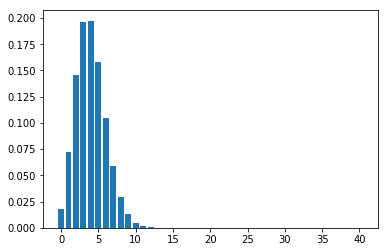

In [12]:
# ให้ n = 100, p = 0.04, np = 4
n, p = 200, 0.02

x = np.arange(0, 41, 1)
y = [binom.pmf(i, n, p) for i in x]

plt.bar(x,y)

**กรณีที่สาม ให้ $n=1000, p=0.004$**

<Container object of 41 artists>

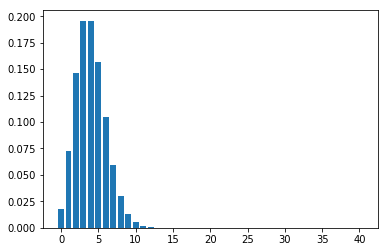

In [13]:
# ให้ n = 100, p = 0.04, np = 4
n, p = 1000, 0.004

x = np.arange(0, 41, 1)
y = [binom.pmf(i, n, p) for i in x]

plt.bar(x,y)

สังเกตว่ากราฟหน้าตาแทบไม่ต่างกันเลย จริง ๆ ดูด้วยตาไม่น่าออก

### มาวิเคราะห์การกระจายกัน

กลับมาดูค่าความน่าจะเป็นที่ตัวแปรสุ่มจะมีค่าเท่ากับ $i$ อีกครั้ง (จะเขียนแทนด้วย $f(i)$) เราจะลองพิจารณาค่าดังกล่าว ถ้าปรับค่า $n$ ให้เข้าใกล้ $\infty$ แต่ยังคงค่าเฉลี่ย $np$ ให้เท่าเดิม

เพื่อความสะดวกเรากำหนดให้ $\lambda = np$

จากนิยาม เราทราบว่า

$$f(i) = {n\choose i}p^i(1-p)^{n-i}$$

พิจารณาเทอม ${n\choose i}$  สังเกตว่า

$${n\choose i}=\frac{n!}{(n-i)!\cdot i!} = \frac{n(n-1)(n-2)\cdots (n-i+1)}{i!}$$

เมื่อ $n\rightarrow\infty$ ค่า $n-i+1$ จะใกล้กับ $n$ มาก เราจึงเขียนได้ว่า

$${n\choose i} = \frac{n(n-1)(n-2)\cdots (n-i+1)}{i!} \approx \frac{n^i}{i!}$$

เราจะพิจารณาส่วนถัดไป เนื่องจาก $\lambda=np$ เราจะเขียน $p = \lambda/n$  ดังนั้นจะได้ว่า

$$p^i(1-p)^{n-i}=\left(\frac{\lambda}{n}\right)^i \left(1-\frac{\lambda}{n}\right)^{n-i}$$

เนื่องจาก $n-i$ ใกล้กับ $n$ มากเมื่อ $n\rightarrow\infty$ เราจึงเขียน

$$p^i(1-p)^{n-i}=\left(\frac{\lambda}{n}\right)^i \left(1-\frac{\lambda}{n}\right)^{n-i} \approx \left(\frac{\lambda}{n}\right)^i \left(1-\frac{\lambda}{n}\right)^{n}$$

อย่างไรก็ตาม เมื่อ $n\rightarrow\infty$ เราทราบว่า

$$\left(1-\frac{\lambda}{n}\right)^{n}\approx e^{-\lambda}$$

ดังนั้น

$$p^i(1-p)^{n-i}=\approx \left(\frac{\lambda}{n}\right)^i \left(1-\frac{\lambda}{n}\right)^{n} \approx \left(\frac{\lambda}{n}\right)^i e^{-\lambda}$$


รวมสองส่วนเข้าด้วยกันเราจะได้ว่า

$$f(i)\approx \frac{n^i}{i!}\cdot \left(\frac{\lambda}{n}\right)^i e^{-\lambda} = \frac{\lambda^i e^{-\lambda}}{i!}$$

ซึ่งตรงกับนิยามของการกระจายแบบ Poisson ([ดูที่วิกิพีเดีย](https://en.wikipedia.org/wiki/Poisson_distribution))

ลองมาพลอตการกระจายคู่กันเมื่อ $n$ มีค่าต่าง ๆ และ $\lambda=np=4$ อีกครั้ง เพื่อความชัดเจนจะพลอตแค่ $x$ มีค่าไม่เกิน 15 เท่านั้น

In [16]:
import math
def faprox(lmda,i):
    return (lmda**i) * math.exp(-lmda) / math.factorial(i)

#### ทดลองที่ n = 10

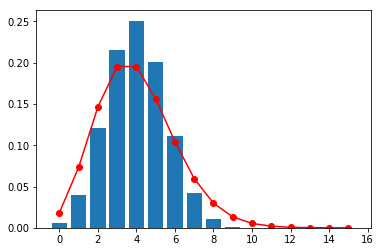

In [25]:
n, p = 10, 0.4

x = np.arange(0, 16, 1)
y = [binom.pmf(i, n, p) for i in x]
yy = [faprox(4,i) for i in x]

plt.bar(x,y)
plt.plot(x,yy,'ro-')

สังเกตว่าลักษณะการเปลี่ยนแปลงค่อนข้างตรง แต่ค่ายังต่างกันอยู่มาก

#### ทดลองที่ n = 40

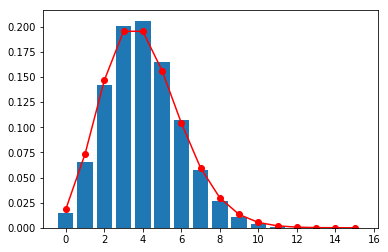

In [22]:
n, p = 40, 0.1

x = np.arange(0, 16, 1)
y = [binom.pmf(i, n, p) for i in x]
yy = [faprox(4,i) for i in x]

plt.bar(x,y)
plt.plot(x,yy,'ro-')

เริ่มใกล้กันมากขึ้น

#### ทดลองที่ n = 100

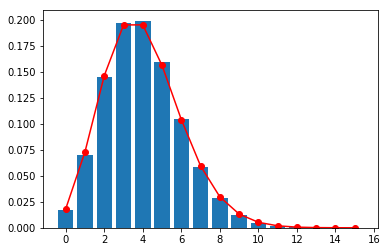

In [24]:
n, p = 100, 0.04

x = np.arange(0, 16, 1)
y = [binom.pmf(i, n, p) for i in x]
yy = [faprox(4,i) for i in x]

plt.bar(x,y)
plt.plot(x,yy,'ro-')

สังเกตว่าแทบมองไม่เห็นความแตกต่าง

### แล้วจะเข้าใจ Poisson distribution ได้อย่างไร

จากการอธิบายข้างต้น เราอาจจะพิจารณา Poisson distribution ว่าเป็นเหมือนการทดลองที่มีการทดลองย่อยทำซ้ำจำนวนมาก ๆ (โยนเหรียญจำนวนมากๆ) โดยที่แต่ละการทดลองย่อยมีโอกาสสำเร็จน้อยมาก แต่เราทราบว่าโดยเฉลี่ยแล้วจะมีจำนวนการสำเร็จเท่ากับ $\lambda$ ครั้ง (มักนิยมเรียกว่าเป็น rate ของ Poisson distribution)

ยกตัวอย่างเช่น มีคนกล่าวว่าในการขุดบิตคอยน์นั้น จะได้บล็อคใหม่โดยเฉลี่ยทุก ๆ สิบนาที และเวลาในการขุดเป็น Poisson distribution  ถ้ามองจากมุมที่เราได้พิจารณามาก็สอดคล้องกับสภาพความเห็นจริงที่ในการสร้างบล็อคนั้น ต้องมีการพยายามทำให้ค่า hash มีคุณสมบัติบางอย่างที่ในทางปฏิบัติต้องหาโดยการทดลองจนกว่าจะเจอ (trial-and-error) และมีผู้พยายามหาจำนวนมาก แต่ละคนมีโอกาสสำเร็จน้อยมาก ๆ แต่มีอัตราการสำเร็จอยู่ที่ 0.1 ครั้งต่อนาที   (ดังนั้นในการคิดก็คือจะใช้ $\lambda=0.1$ เป็นต้น)